In [339]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

sales_url = r"C:\Users\fomin\GitHub_projects\Analytics\Zara_sales\zara_sales.csv"
sales = pd.read_csv(sales_url, sep = ';')

sales.head()

# Импортируем нужные библиотеки, подгружаем файл с данными и смотрим его

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,2024-02-19T08:50:05.654618,jackets,MAN
1,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,USD,2024-02-19T08:50:06.590930,jackets,MAN
2,180176,End-cap,Yes,Clothing,Yes,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,USD,2024-02-19T08:50:07.301419,jackets,MAN
3,112917,Aisle,Yes,Clothing,Yes,1568,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,328303236-420-44,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,129.00,USD,2024-02-19T08:50:07.882922,jackets,MAN
4,192936,End-cap,No,Clothing,Yes,2942,Zara,https://www.zara.com/us/en/double-faced-jacket...,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,139.00,USD,2024-02-19T08:50:08.453847,jackets,MAN


In [340]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

# Устанавливаем настройки для графиков, которые будем использовать

In [341]:
sales.columns = sales.columns.str.lower().str.replace(' ', '_')

# Приводим к удобному для работы виду названия колонок 

In [342]:
sales['revenue_by_item'] = sales.sales_volume * sales.price

# Вводим новый столбец, который описывает выручку с айтема - перемножив количество проданного товара на его цену

In [343]:
sales.duplicated().sum()

# Проверка на дубликаты

0

In [344]:
sales.isnull().sum()

# Проверка на нулевые значения

product_id          0
product_position    0
promotion           0
product_category    0
seasonal            0
sales_volume        0
brand               0
url                 0
sku                 0
name                1
description         2
price               0
currency            0
scraped_at          0
terms               0
section             0
revenue_by_item     0
dtype: int64

In [345]:
is_null_df = sales.isnull()
row_with_null = is_null_df.any(axis=1)
rows_with_null = sales[row_with_null]
rows_with_null

# Поиск строк, где есть хотя бы одно нулевое значение
# Можно дропнуть эти строки из датафрейма, учтя выручку с товаров в них

,product_id,product_position,promotion,product_category,seasonal,sales_volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section,revenue_by_item
60,151925,End-cap,Yes,Clothing,Yes,2179,Zara,https://www.zara.com/us/en/vintage-effect-leat...,320774184-800-97,VINTAGE EFFECT LEATHER BOMBER JACKET,NaN,299.0,USD,2024-02-19T08:50:43.543555,jackets,MAN,651521.0
72,173576,End-cap,Yes,Clothing,No,1838,Zara,https://www.zara.com/us/en/-p04310461.html,336378923-700-2,NaN,NaN,129.0,USD,2024-02-19T08:50:54.476057,jackets,MAN,237102.0


In [346]:
np.round(100 - (sales.revenue_by_item.sum() - rows_with_null.revenue_by_item.sum())/sales.revenue_by_item.sum()*100, 2)

# Считаем % выручки, который уйдет при дропе строчек с нулями

2.28

In [347]:
sales = sales.dropna()

# Дропаем нулевые значения

In [348]:
sales.product_category.unique()

# Категория товаров лишь одна, ее нет смысла анализировать

array(['Clothing'], dtype=object)

In [349]:
# Рассмотрим данные в отношении выручки с товаров

In [350]:
sales.name.nunique() - sales.groupby('name').filter(lambda x: len(x) == 1).shape[0]

# Получается 40 уникальных названий товара, name, повторяются в датафрейме sales

40

In [351]:
nunique_name = sales.groupby(['name'], as_index=False).agg({'revenue_by_item':'count'}).sort_values('revenue_by_item') \
    .rename(columns={'revenue_by_item':'counts_in_df'})

nunique_name.loc[nunique_name.counts_in_df > 1]

# Датафрейм уникальных значений name, которые повторяются 2 или более раз

,name,counts_in_df
162,SUIT JACKET,2
185,WOOL BLEND JACKET,2
160,SUEDE SNEAKERS,2
167,TECHNICAL PADDED JACKET,2
0,100% FEATHER FILL PUFFER JACKET,2
145,STRETCH POCKET OVERSHIRT,2
13,BAGGY FIT JEANS,2
24,BOUCLÉ TEXTURED JACKET,2
38,CONTRASTING COLLAR JACKET,2
45,CROPPED BOMBER JACKET LIMITED EDITION,2


In [352]:
repeated_names_df = sales[sales.groupby('name')['name'].transform('size') > 1].sort_values('name')

repeated_names_df

# Датафрейм товаров, где значение name встречается в датафпрейме sales более одного раза

,product_id,product_position,promotion,product_category,seasonal,sales_volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section,revenue_by_item
9,137121,Aisle,No,Clothing,Yes,656,Zara,https://www.zara.com/us/en/100-feather-fill-pu...,312372602-800-2,100% FEATHER FILL PUFFER JACKET,Puffer jacket made of shiny finish technical f...,169.0,USD,2024-02-19T08:50:11.380061,jackets,MAN,110864.0
97,120228,End-cap,No,Clothing,No,2347,Zara,https://www.zara.com/us/en/100-feather-fill-pu...,327116625-505-2,100% FEATHER FILL PUFFER JACKET,Puffer vest made of technical fabric. Fill is ...,89.9,USD,2024-02-19T08:51:09.075286,jackets,MAN,210995.3
200,141547,End-cap,No,Clothing,No,1426,Zara,https://www.zara.com/us/en/baggy-fit-jeans-p06...,315738965-802-34,BAGGY FIT JEANS,Baggy fit jeans. Five pockets. Washed effect. ...,69.9,USD,2024-02-19T08:54:39.496146,jeans,MAN,99677.4
199,198283,End-cap,Yes,Clothing,Yes,1558,Zara,https://www.zara.com/us/en/baggy-fit-jeans-p08...,315836999-406-34,BAGGY FIT JEANS,Baggy fit jeans. Five pockets. Washed effect. ...,69.9,USD,2024-02-19T08:54:39.017964,jeans,MAN,108904.2
92,146839,Aisle,No,Clothing,No,1525,Zara,https://www.zara.com/us/en/bomber-jacket-p0534...,321496813-710-2,BOMBER JACKET,Jacket with padded interior. Rib elastic colla...,109.0,USD,2024-02-19T08:51:06.241653,jackets,MAN,166225.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,182157,Aisle,No,Clothing,No,2421,Zara,https://www.zara.com/us/en/suit-jacket-in-100-...,322972485-431-46,SUIT JACKET IN 100% LINEN,Straight fit blazer made of linen. Notched lap...,159.0,USD,2024-02-19T08:50:10.200777,jackets,MAN,384939.0
79,143231,Aisle,No,Clothing,No,2578,Zara,https://www.zara.com/us/en/technical-padded-ja...,311297745-800-2,TECHNICAL PADDED JACKET,Jacket made of technical fabric with padded in...,89.9,USD,2024-02-19T08:50:58.065096,jackets,MAN,231762.2
75,162883,Front of Store,Yes,Clothing,No,786,Zara,https://www.zara.com/us/en/technical-padded-ja...,311307584-518-2,TECHNICAL PADDED JACKET,Jacket made of technical fabric with padded in...,139.0,USD,2024-02-19T08:50:55.898064,jackets,MAN,109254.0
62,135610,Aisle,Yes,Clothing,Yes,1513,Zara,https://www.zara.com/us/en/wool-blend-jacket-p...,321501682-800-2,WOOL BLEND JACKET,Jacket made of wool blend fabric. Lapel collar...,109.0,USD,2024-02-19T08:50:45.034237,jackets,MAN,164917.0


In [353]:
a = []
for i in repeated_names_df.name.unique():
    if repeated_names_df.groupby(['name', 'terms']).revenue_by_item.sum().loc[i].size > 1:
        a.append(i)        
        
a

# Находим названия товаров name, которые в датафрейме sales встречаются с разной маркировкой в типе товара (параметр terms)
# и записываем их в лист. 

['BOUCLÉ TEXTURED JACKET',
 'CROPPED LEATHER JACKET',
 'DENIM BOMBER JACKET',
 'FAUX LEATHER BOMBER JACKET',
 'FAUX LEATHER BOXY FIT JACKET',
 'FAUX LEATHER JACKET',
 'FAUX SUEDE BOMBER JACKET',
 'HERRINGBONE TEXTURED JACKET',
 'JACQUARD DENIM JACKET',
 'LEATHER BIKER JACKET',
 'LEATHER JACKET',
 'LIGHTWEIGHT BOMBER JACKET',
 'OVERSIZED CROPPED JACKET LIMITED EDITION',
 'PADDED DENIM JACKET',
 'PATCH BOMBER JACKET',
 'SUIT JACKET',
 'SUIT JACKET IN 100% LINEN']

In [354]:
sales.query('name == @a').sort_values('name')

# Сортируем датафрейм sales по тем наименованиям товаров, name, которые встречаются с разной маркировкой по параметру terms -
# тип товара

# Вопрос состоит в том, ошибка ли это или есть какие-то особенности, в реальной жизни имел бы смысл отправить запрос на
# разъяснение ситуации в соответствующую команду, т.к. товар, который имеет в названии "Jacket" тут может быть отнесен
# и к jackets, и к sweaters

,product_id,product_position,promotion,product_category,seasonal,sales_volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section,revenue_by_item
236,195103,Aisle,Yes,Clothing,No,2849,Zara,https://www.zara.com/us/en/knit-sweater-with-p...,330290387-401-2,BOUCLÉ TEXTURED JACKET,Varsity jacket with elastic collar and long sl...,109.00,USD,2024-02-19T09:10:36.839166,t-shirts,MAN,310541.00
18,155050,Aisle,No,Clothing,Yes,2321,Zara,https://www.zara.com/us/en/boucle-textured-jac...,316205038-615-2,BOUCLÉ TEXTURED JACKET,Cropped jacket made with wool blend fabric. Hi...,129.00,USD,2024-02-19T08:50:16.580479,jackets,MAN,299409.00
13,151396,Front of Store,Yes,Clothing,Yes,729,Zara,https://www.zara.com/us/en/cropped-leather-jac...,323134418-800-3,CROPPED LEATHER JACKET,Leather jacket. Cropped length. Lapel collar a...,439.00,USD,2024-02-19T08:50:13.771115,jackets,MAN,320031.00
231,119044,Aisle,No,Clothing,Yes,1140,Zara,https://www.zara.com/us/en/soft-jewel-sweater-...,320026789-714-2,CROPPED LEATHER JACKET,Relaxed fit overshirt made of 25% wool fabric....,169.00,USD,2024-02-19T09:10:33.890995,sweaters,MAN,192660.00
17,195879,Front of Store,Yes,Clothing,Yes,2339,Zara,https://www.zara.com/us/en/denim-bomber-jacket...,321496837-400-3,DENIM BOMBER JACKET,Jacket made of denim fabric with padded interi...,129.00,USD,2024-02-19T08:50:15.895051,jackets,MAN,301731.00
235,144651,Aisle,Yes,Clothing,No,1791,Zara,https://www.zara.com/us/en/jewel-knit-sweater-...,312571093-710-2,DENIM BOMBER JACKET,Relaxed fit overshirt made of wool blend fabri...,139.00,USD,2024-02-19T09:10:36.152051,t-shirts,MAN,248949.00
243,172015,End-cap,Yes,Clothing,Yes,2622,Zara,https://www.zara.com/us/en/striped-crop-knit-s...,313008692-514-2,FAUX LEATHER BOMBER JACKET,Cropped overshirt. Lapel collar and long sleev...,139.00,USD,2024-02-19T09:10:41.519426,t-shirts,MAN,364458.00
34,172364,Aisle,Yes,Clothing,No,2931,Zara,https://www.zara.com/us/en/faux-leather-bomber...,317782474-800-2,FAUX LEATHER BOMBER JACKET,Jacket made of faux leather fabric. Rib elasti...,109.00,USD,2024-02-19T08:50:26.108791,jackets,MAN,319479.00
25,198248,Front of Store,Yes,Clothing,No,1644,Zara,https://www.zara.com/us/en/faux-leather-bomber...,311309526-800-2,FAUX LEATHER BOMBER JACKET,Jacket made of faux leather fabric. High colla...,69.90,USD,2024-02-19T08:50:20.387337,jackets,MAN,114915.60
232,121348,End-cap,No,Clothing,Yes,1008,Zara,https://www.zara.com/us/en/faux-fur-jewel-swea...,323216360-406-2,FAUX LEATHER BOXY FIT JACKET,Relaxed fit overshirt made of stretch fabric. ...,169.00,USD,2024-02-19T09:10:34.521463,t-shirts,MAN,170352.00


In [ ]:
# Построим топ-10 товаров по выручке, т.е. 10 уникальных наименований, продажа которых принесла наибольшую выручку

In [403]:
top10_rev = sales \
    .groupby('name', as_index=False) \
    .agg({'revenue_by_item':'sum'}) \
    .sort_values('revenue_by_item', ascending = False).head(10)

top10_rev
# Считаем выручку по названию товара, name, в списке продаж, находим топ-10 продаж

,name,revenue_by_item
39,CONTRASTING PATCHES BOMBER JACKET,889308.0
163,SUIT JACKET IN 100% LINEN,816675.0
57,FAUX LEATHER BOMBER JACKET,798852.6
118,PLAID OVERSHIRT,695369.0
136,RIB COLLAR JACKET,685883.0
141,SLIM FIT SUIT JACKET,675719.0
124,POCKET OVERSHIRT,666987.8
155,SUEDE JACKET,649140.0
24,BOUCLÉ TEXTURED JACKET,609950.0
123,POCKET JACKET,608503.0


<Axes: xlabel='price', ylabel='count'>

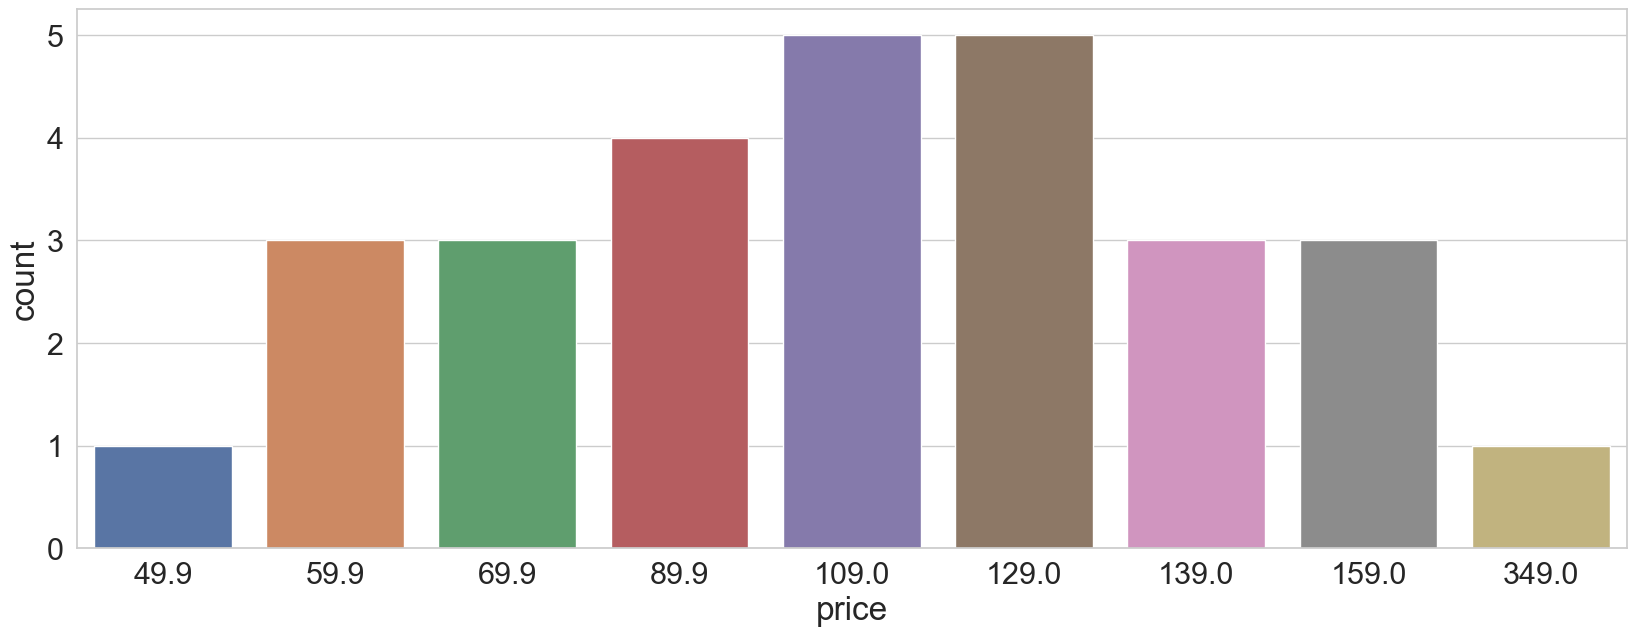

In [419]:
top10_items_rev_df = sales.query('name == @top10_rev.name.to_list()')

# Создаем датафрейм, в который входят только строки с наименованиями тех товаров, что в сумме приносят топ-10 выручки

sns.countplot(top10_items_rev_df, x = 'price')

# Строим распределение цен по которым продаются товары (по name), приносящие в сумме топ-10 выручки среди всех товаров

<Axes: xlabel='price', ylabel='Revenue, mil $'>

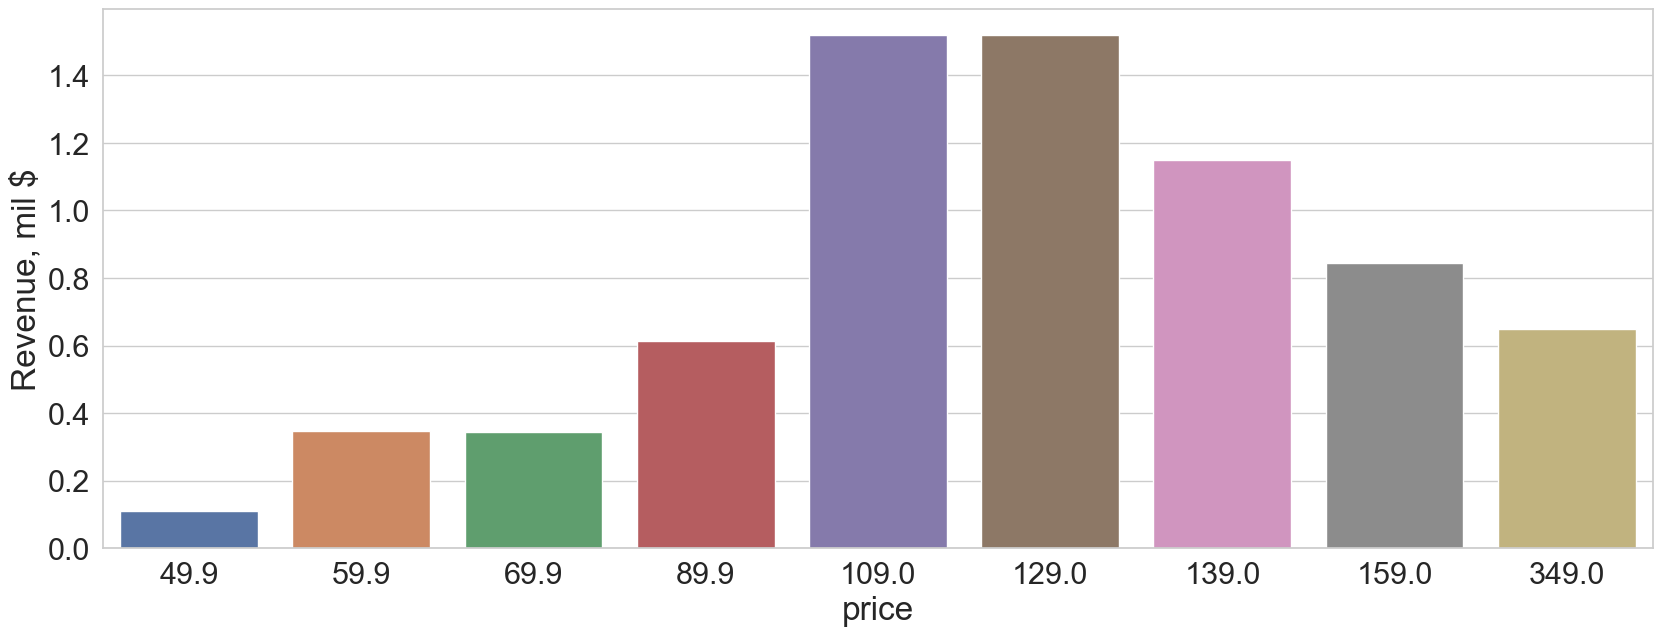

In [428]:
sns.barplot(y=top10_items_rev_df \
                .groupby('price', as_index=False) \
                .revenue_by_item.sum() \
                .revenue_by_item \
                .rename('Revenue, mil $') / 1000000,
            x=top10_items_rev_df \
                .groupby('price', as_index=False) \
                .revenue_by_item.sum() \
                .price)

# Распределение выручки в зависимости от цен товаров из топ-10 по принесенной выручке
# Больше всего денег приносят в топе товары со стоимость 109$ и 129$

Text(0.5, 1.0, "Revenue by product's type and position")

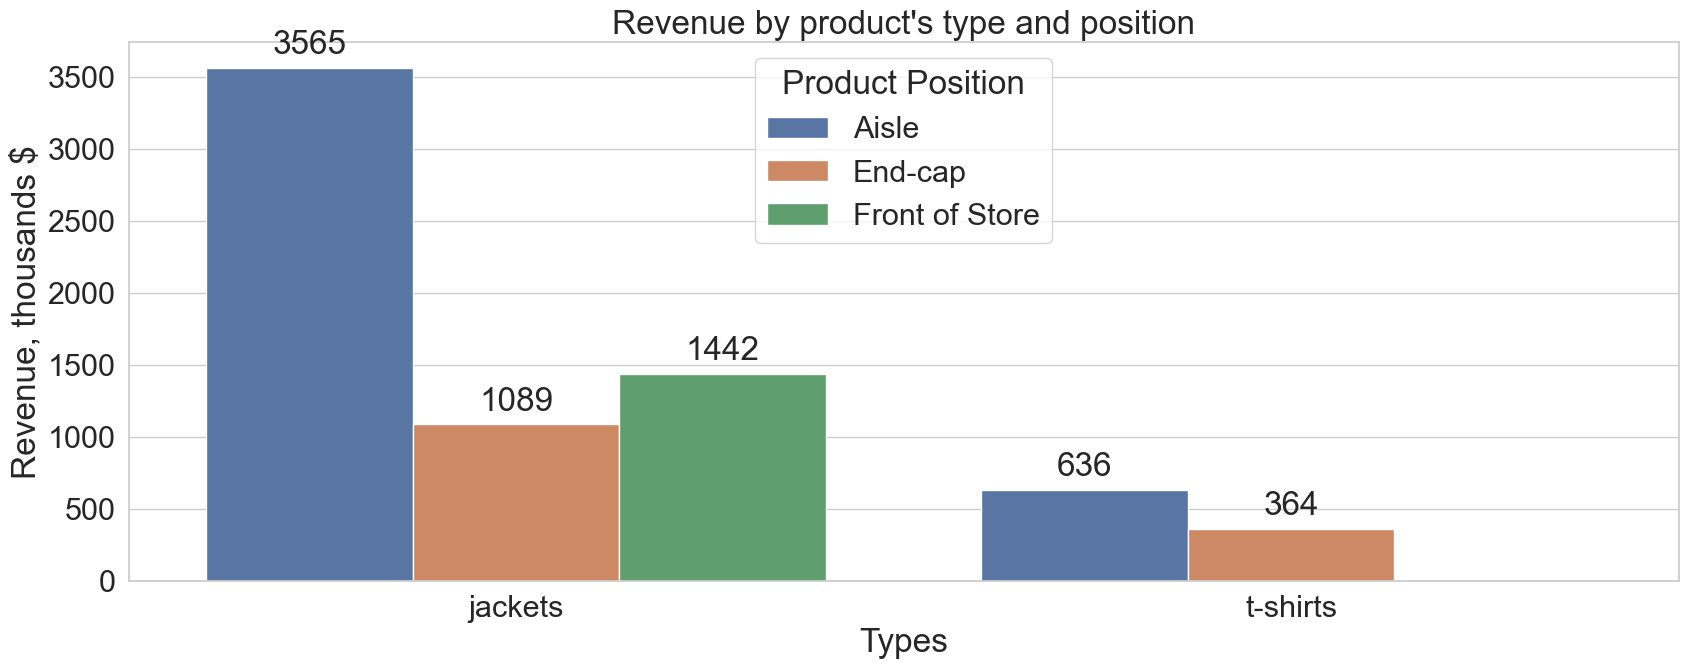

In [432]:
top10_items_terms_prodpos_rev = top10_items_rev_df.groupby(['terms', 'product_position'], as_index=False).revenue_by_item.sum()

# Строим датафрейм о выручке топ-10 продуктах в зависимости от параметров terms и product_position

ax0 = sns.barplot(x=top10_items_terms_prodpos_rev.terms.rename('Types'),
            y=top10_items_terms_prodpos_rev.revenue_by_item.rename('Revenue, thousands $') / 1000, 
            hue=top10_items_terms_prodpos_rev.product_position.rename('Product Position'))

for c in ax0.containers:
    ax0.bar_label(c, fmt='%.0f', padding=5)
    
ax0.set_title('''Revenue by product's type and position''')

# Визуализировали выручку топ-10 продуктов в зависимости от их типа (type) и позиции в магазине (product_position)

In [ ]:
# Изучим теперь распределение выручки по всем ценам исходного датафрейма sales

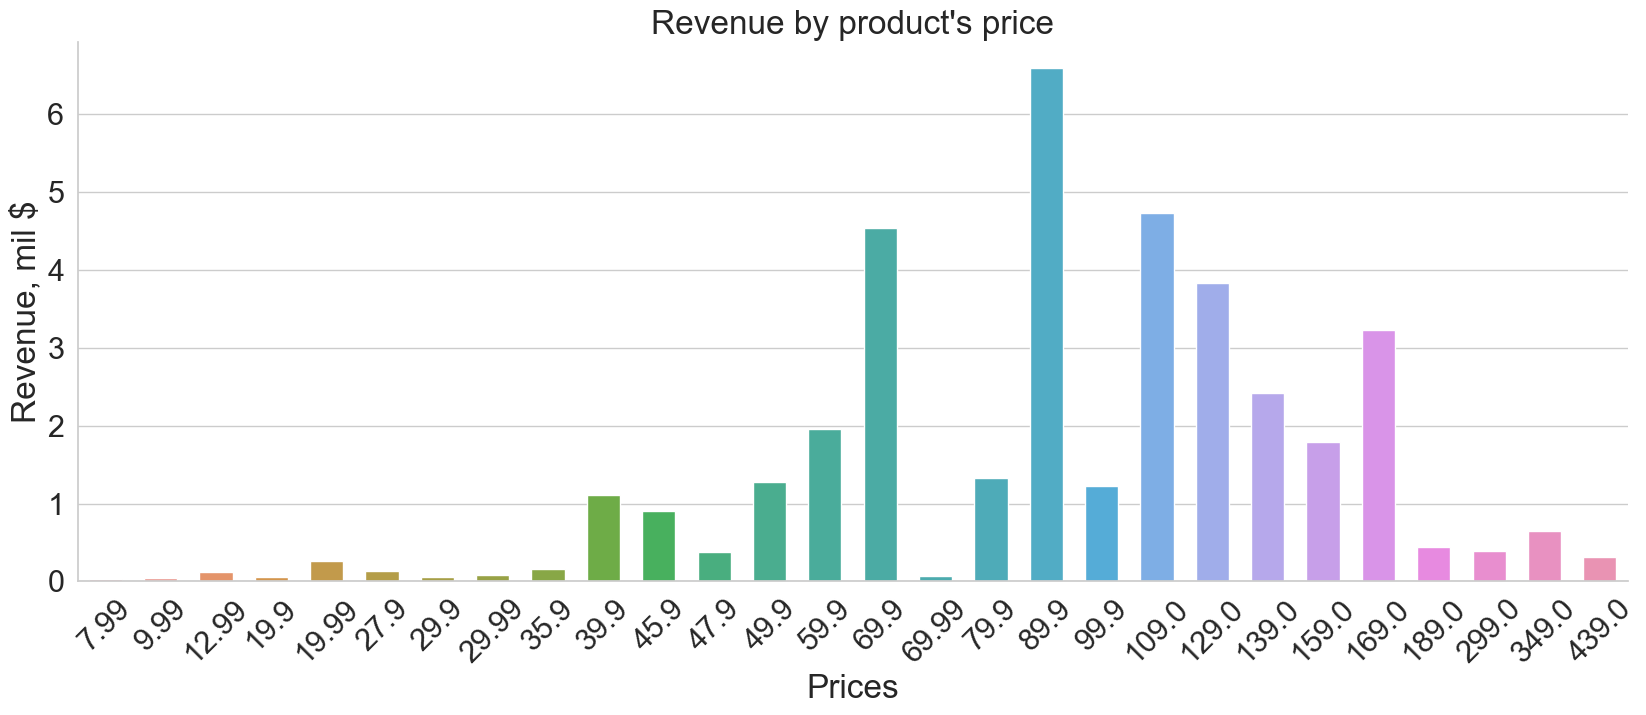

In [367]:
rev_by_price_df = sales \
    .groupby('price', as_index = False) \
    .revenue_by_item.sum()

# Создаем датафрейм выручки, полученной в зависимости от цены айтема


plt.pyplot.xticks(rotation=45)
ax0_1 = sns.barplot(x = rev_by_price_df.price, y = rev_by_price_df.revenue_by_item/1000000, width = 0.6)
ax0_1.set_title('''Revenue by product's price''')
ax0_1.set(ylabel='Revenue, mil $', xlabel='Prices')
sns.despine()

# Получаем распределение выручки в зависимости от цены вещи - смотрим, какие ценовые сегменты приносят более всего денег


# кластеризуй эти данные по ценам

In [371]:
# Теперь рассмотрим данные в разрезе мужского и женского отдела продаж

<Axes: xlabel='section', ylabel='count'>

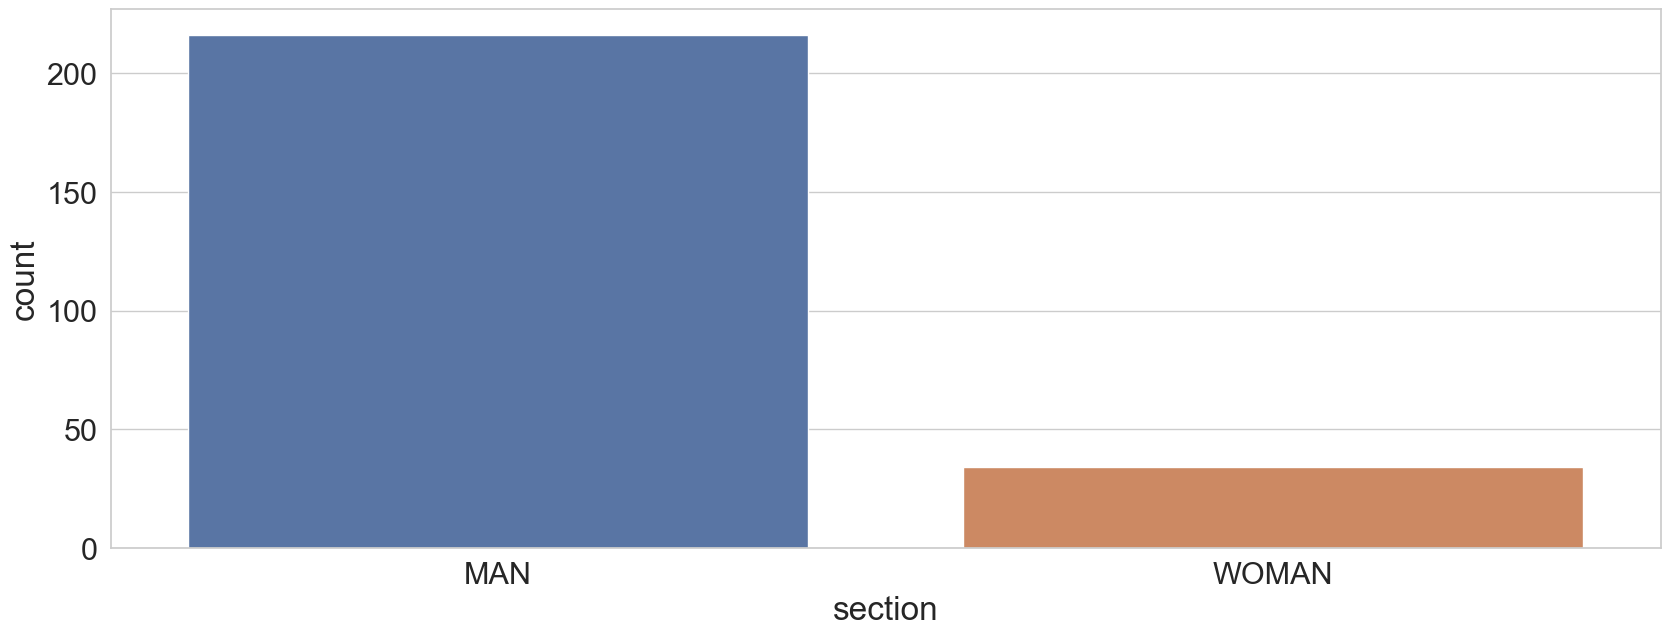

In [372]:
sns.countplot(sales, x = "section")

# Количество покупок в мужском и женском отделах

[Text(0.5, 0, 'Gender'), Text(0, 0.5, 'Revenue, mil $')]

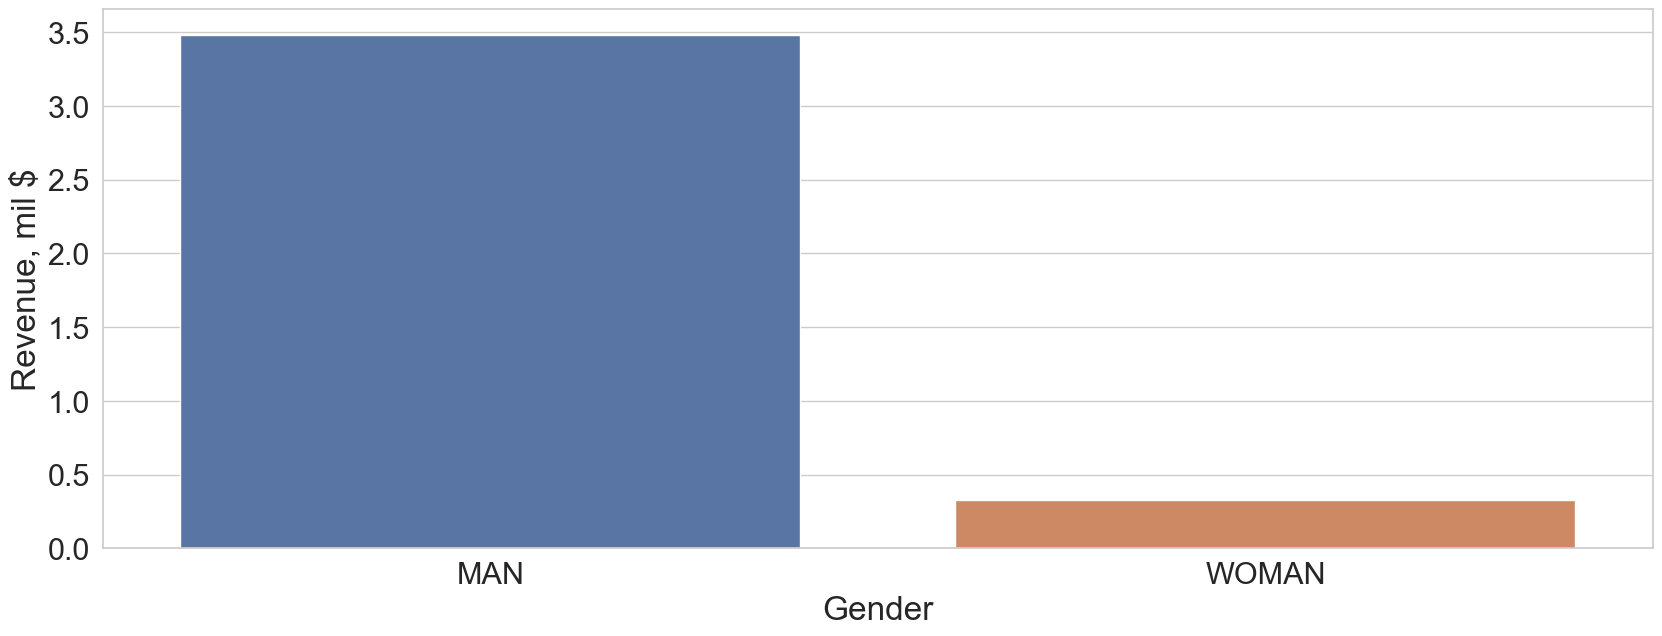

In [373]:
rev_by_gender_df = sales \
    .groupby('section', as_index=False) \
    .revenue_by_item.sum() \
    .rename(columns={'revenue_by_item':'revenue'})

rev_by_gender_df['revenue_share'] = np.round(rev_by_gender_df.revenue / rev_by_gender_df.revenue.sum() * 100,1)

# Создаем датафрейм с выручкой по гендерам rev_by_gender_df
# и отдельно столбец с долей выручки каждого отдела продаж (М и Ж) revenue_share

ax1 = sns.barplot(x=rev_by_gender_df.section, y=rev_by_gender_df.revenue /10000000)
ax1.set(xlabel='Gender', ylabel='Revenue, mil $')
# Выручка, принесенная мужским и женским отделами

In [374]:
count_purch_by_gender_df = sales \
    .groupby('section', as_index=False) \
    .sales_volume.sum() \
    .rename(columns={'sales_volume':'number_of_purchases'})

count_purch_by_gender_df['num_of_purch_share'] = np.round(count_purch_by_gender_df.number_of_purchases / count_purch_by_gender_df.number_of_purchases.sum() * 100,1)
# Создаем датафрейм с количеством покупок по гендерной секции count_purch_by_gender_df
# и отдельно столбец с долей количества покупок каждого отдела продаж (М и Ж) num_of_purch_share

gender_df = rev_by_gender_df.merge(count_purch_by_gender_df)
gender_df['mean_revenue_by_gend'] = np.round(gender_df.revenue / gender_df.number_of_purchases, 2)
gender_df['mean_rev_by_gen_share'] = np.round(gender_df.mean_revenue_by_gend / gender_df.mean_revenue_by_gend.sum() * 100, 2)

gender_df

# Создаем столбец mean_revenue_by_gend, в котором посчитали среднюю выручку с одной покупки для секций мужчин и женщин
# Также создали столбец mean_rev_by_gen_share, в котором посчитали долю секций в средней выручке

,section,revenue,revenue_share,number_of_purchases,num_of_purch_share,mean_revenue_by_gend,mean_rev_by_gen_share
0,MAN,34824040.03,91.4,392182,86.1,88.80,63.21
1,WOMAN,3275813.45,8.6,63374,13.9,51.69,36.79


In [375]:
# Все относительные показатели, такие, как доля выручки на гендерный отдел, revenue_share,
# доля количества покупок на гендерный отдел, num_of_purch_share,
# и доля в среднем чеке по гендерному отделу, mean_rev_by_gen_share,
# говорят о том, что основной целевой аудиторией магазина являются мужчины, 
# потому что их средняя покупка приносит намного больше денег, в среднем они намного чаще покупают, и их просто больше 

# На основе описанных тезисов можно сделать вывод, что в моменте мужская целевая аудитория сильно важнее для магазина

In [376]:
# Рассмотрим теперь данные по категории товаров - колонке terms

<Axes: xlabel='terms', ylabel='Count'>

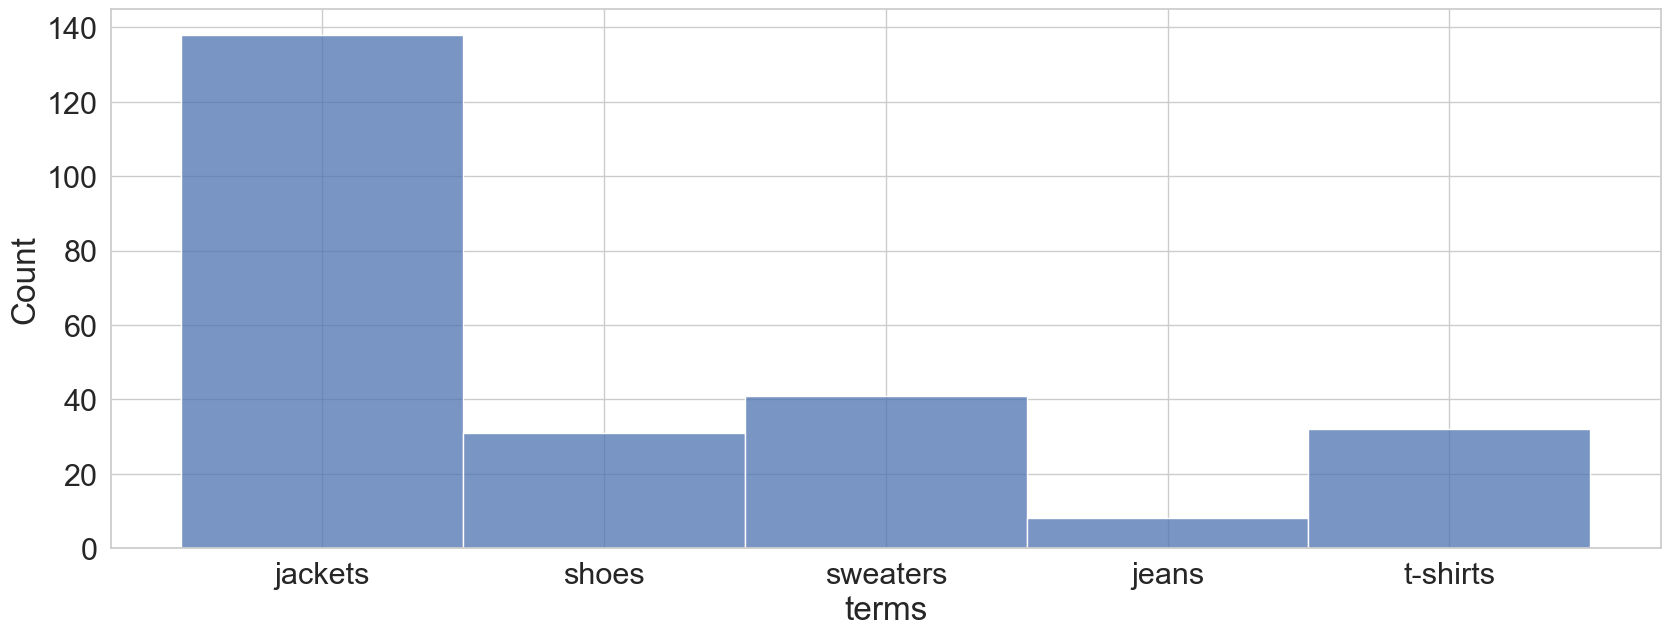

In [377]:
sns.histplot(sales.terms)

# Построим распределение количества товаров по их типу

[Text(0, 0.5, 'Revenue, mil $'), Text(0.5, 0, 'Type')]

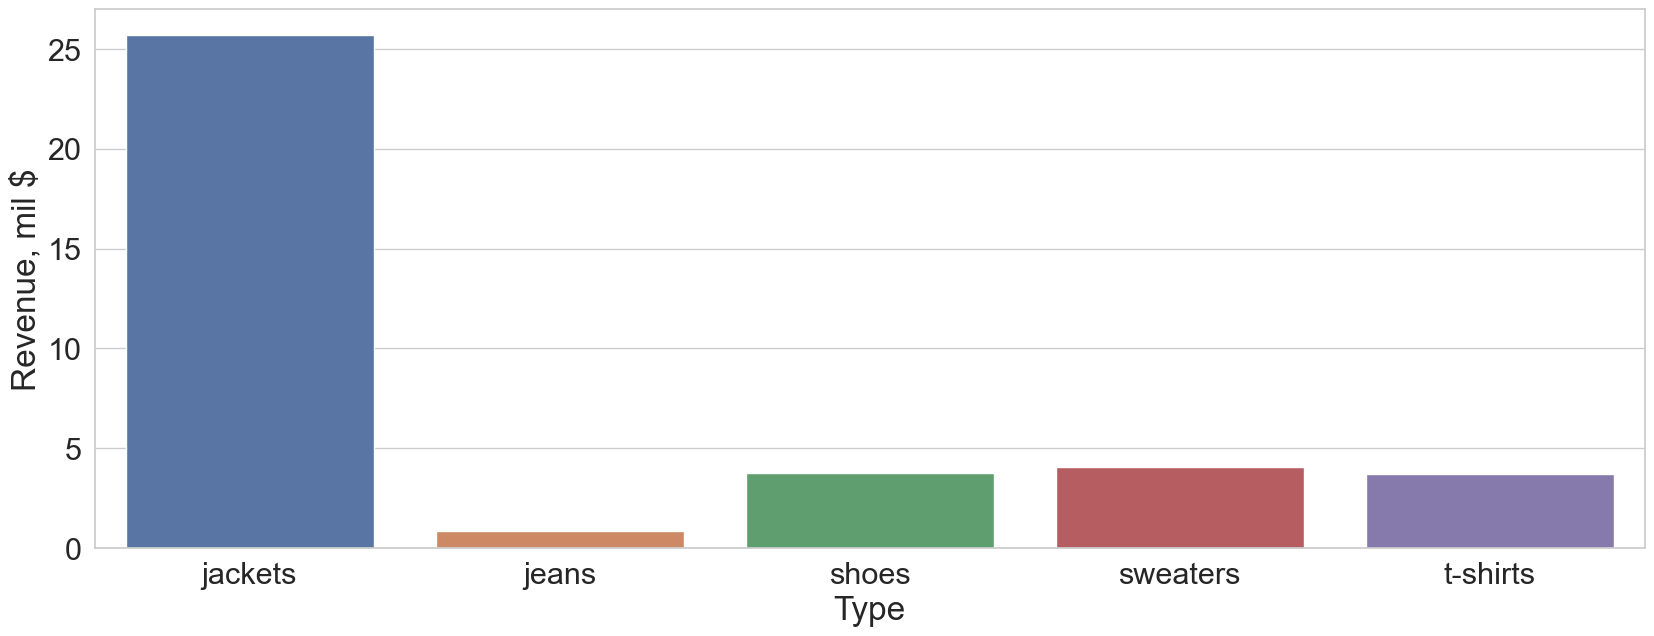

In [378]:
ax2_0 = sns.barplot(x = sales \
                      .groupby('terms', as_index=False) \
                      .revenue_by_item.sum() \
                      .terms,
                  y = sales \
                      .groupby('terms', as_index=False) \
                      .revenue_by_item.sum() \
                      .revenue_by_item / 1000000)

ax2_0.set(ylabel = 'Revenue, mil $', xlabel = 'Type')

# Распределение выручки по типу товаров. Очевидный лидер - jackets. Попробуем разобраться почему это так

In [379]:
sales.terms.value_counts()

# Здесь посчитано количество уникальных позиций по каждому типу товаров. Лидер среди ассортимента - jackets

jackets     138
sweaters     41
t-shirts     32
shoes        31
jeans         8
Name: terms, dtype: int64

[Text(0.5, 0, 'Revenue, mil $'), Text(0, 0.5, 'Type')]

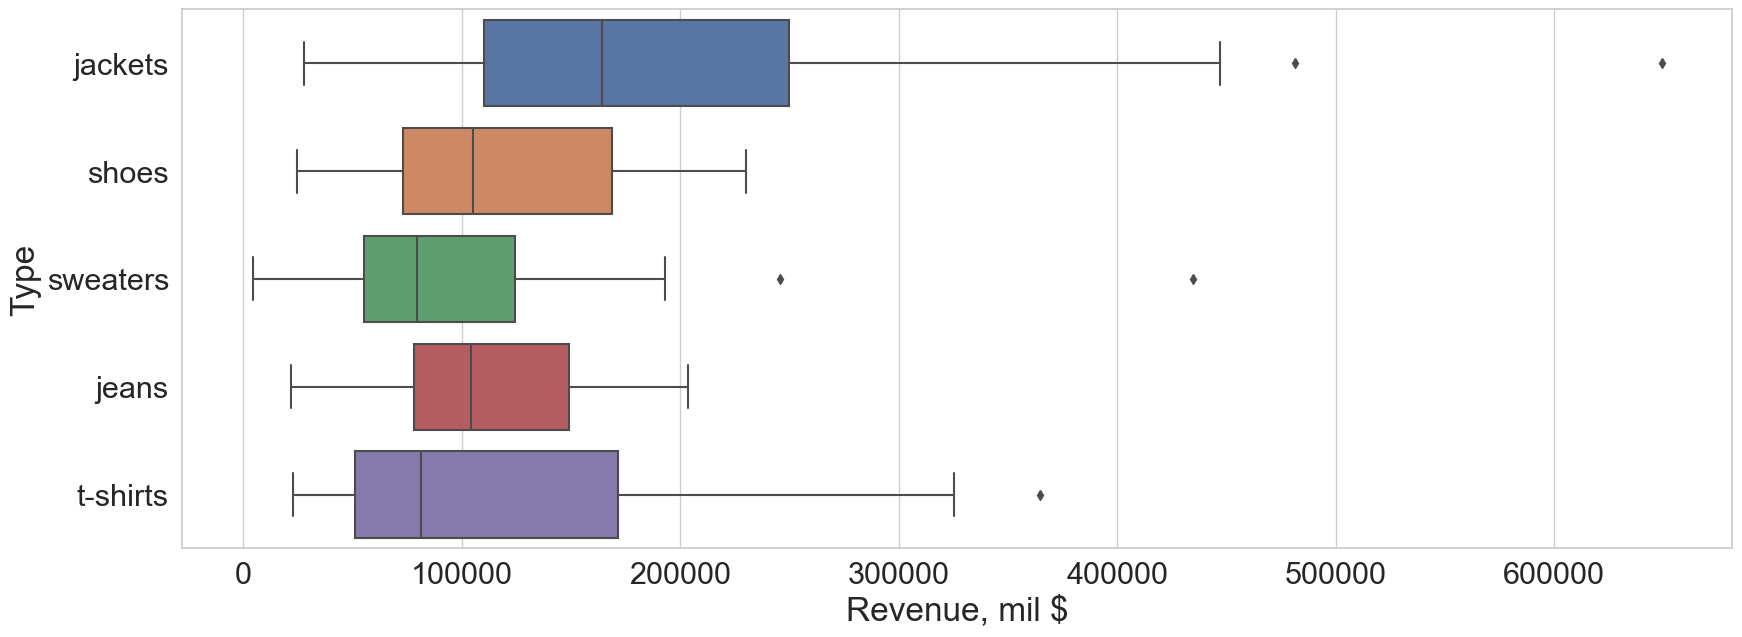

In [380]:
ax2_1 = sns.boxplot(data = sales, x='revenue_by_item', y = 'terms')

ax2_1.set(xlabel = 'Revenue, mil $', ylabel = 'Type')

# Построим боксплот для выручки, приносимой разными типами товаров. Видно, что jackets имеют больше как медианное значение,
# так и межквартильный размах, и экстремумы, и более значительные выбросы. 

[Text(0.5, 0, 'Sales volume'), Text(0, 0.5, 'Type')]

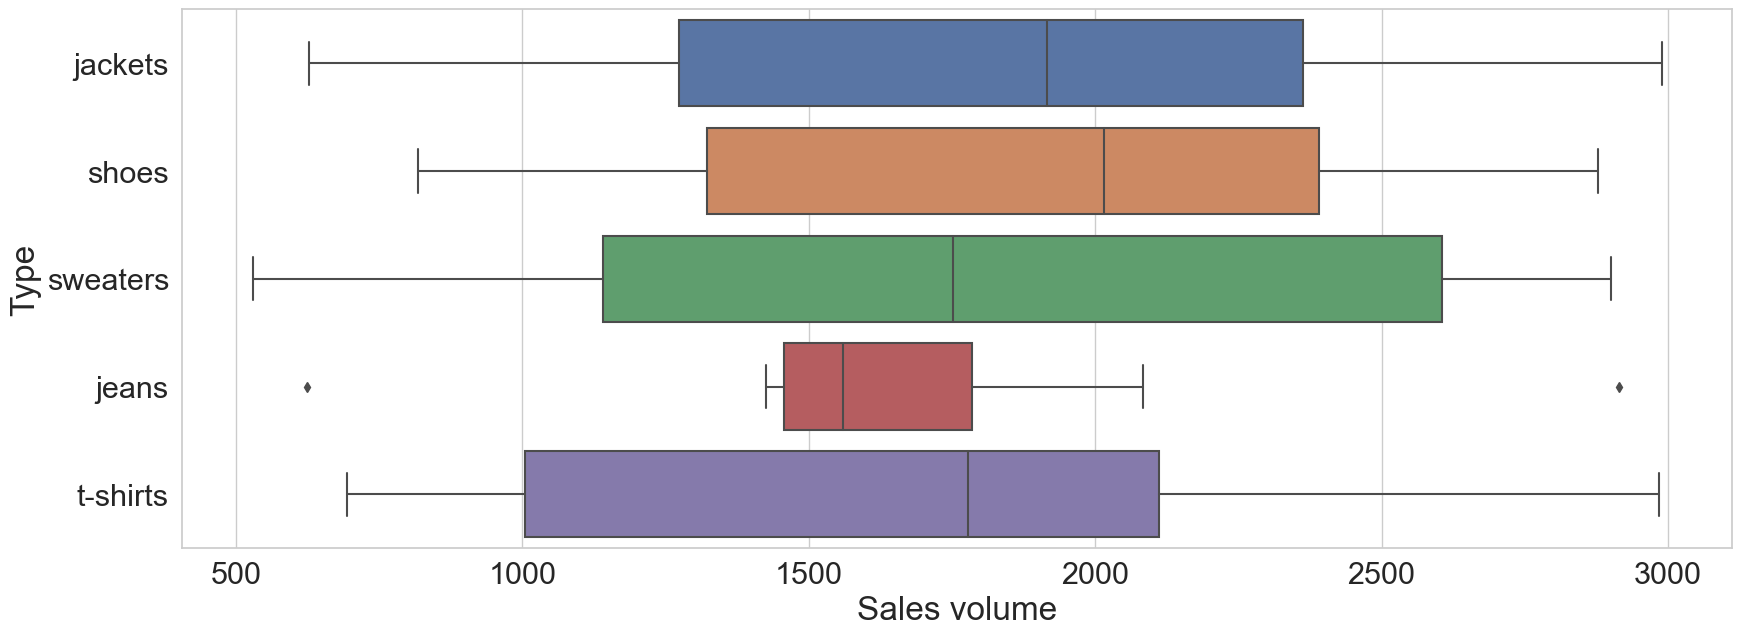

In [381]:
ax2_3 = sns.boxplot(data = sales, x='sales_volume', y = 'terms')

ax2_3.set(xlabel = 'Sales volume', ylabel = 'Type')\

# Здесь приведен боксплот количества проданного товара в зависимости от его типа
# Видно, что люди покупают примерно одинаково все типы, кроме jeans - вероятно людям одинаково нравятся все представленные
# товары внутри этой группы

[Text(0.5, 0, 'Prices'), Text(0, 0.5, 'Type')]

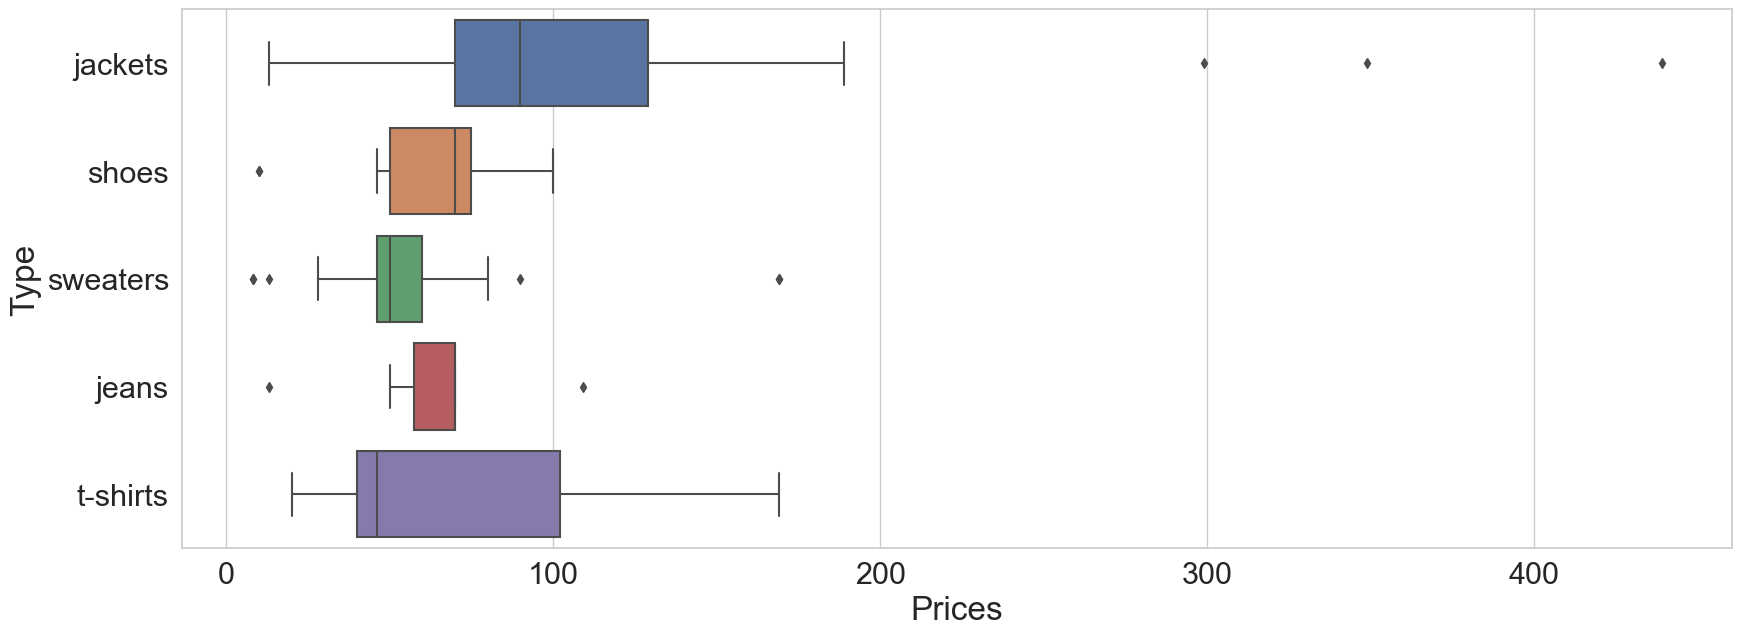

In [382]:
ax2_4 = sns.boxplot(data = sales, x = 'price', y = 'terms')

ax2_4.set(xlabel = 'Prices', ylabel = 'Type')

# В среднем наибольшие цены встречаются чаще всего в категории jackets

In [383]:
# Теперь посмотрим на данные в отношении товаров, которые участвуют в проушене (столбец promotion)

In [384]:
revenue_with_prom = sales \
    .query('promotion == "Yes"') \
    .revenue_by_item.sum() 
revenue_without_prom = sales \
    .query('promotion == "No"') \
    .revenue_by_item.sum()

np.round((revenue_with_prom - revenue_without_prom) / revenue_with_prom * 100, 2)

# Выручка с товаров, участвующих в промоушне, превышает выручку с товаров вне промоушна на 0.58%. 
# Имеет смысл сравнить полученную прибыль с этой дельты выручки с затратами на промоушн,
# чтобы определить эффективность настоящей программы промоушна
# Однако в рамках датасета, который используется в этом проекте, таких данных нет

0.58

In [385]:
# Следует также оценить вклад сезонности товаров на продажи (столбец seasonal)

In [386]:
revenue_with_season = sales.groupby('seasonal', as_index=False).revenue_by_item.sum()

rev_season_diff = np.round(revenue_with_season \
          .query('seasonal == "Yes"') \
          .revenue_by_item.sum() - revenue_with_season.query('seasonal == "No"').revenue_by_item.sum(),2)
rev_season_diff

# Выручка с сезонных товаров превышает выручку с несезонных на 261281.84

261281.84

In [387]:
np.round(rev_season_diff /  revenue_with_season \
          .query('seasonal == "Yes"') \
          .revenue_by_item.sum() * 100,2)

# Выручка с сезонных товаров превышает выручку с несезонных на 1.36%.

1.36

In [388]:
# Обратим внимание на данные по товарам относительно их местонахождения в помещении магазина (столбец product_position)
# Есть 3 варианта: Aisle (проход, коридор), end-cap (конец прохода - aisle), front of store (лицевая часть магазина)

[Text(0.5, 0, 'Revenue, mil $'), Text(0, 0.5, 'Product position')]

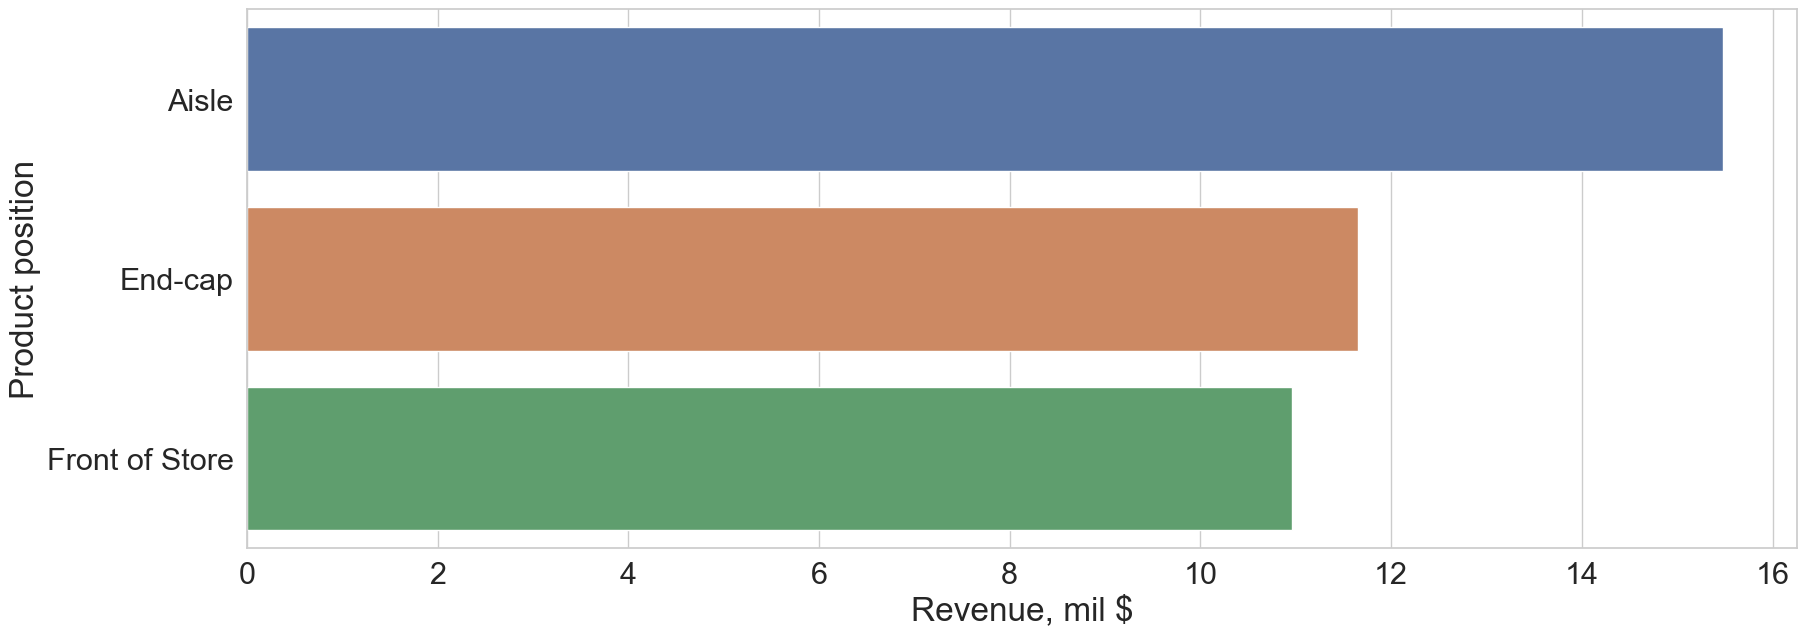

In [389]:
rev_by_prod_pos_df = sales.groupby('product_position', as_index=False).revenue_by_item.sum()

ax3_1 = sns.barplot(y = rev_by_prod_pos_df.product_position,
                    x = rev_by_prod_pos_df.revenue_by_item / 1000000)
ax3_1.set(xlabel='Revenue, mil $', ylabel='Product position')

# Распределение выручки по разным сегментам магазина

[Text(0.5, 0, 'Revenue, mil $'), Text(0, 0.5, 'Product position')]

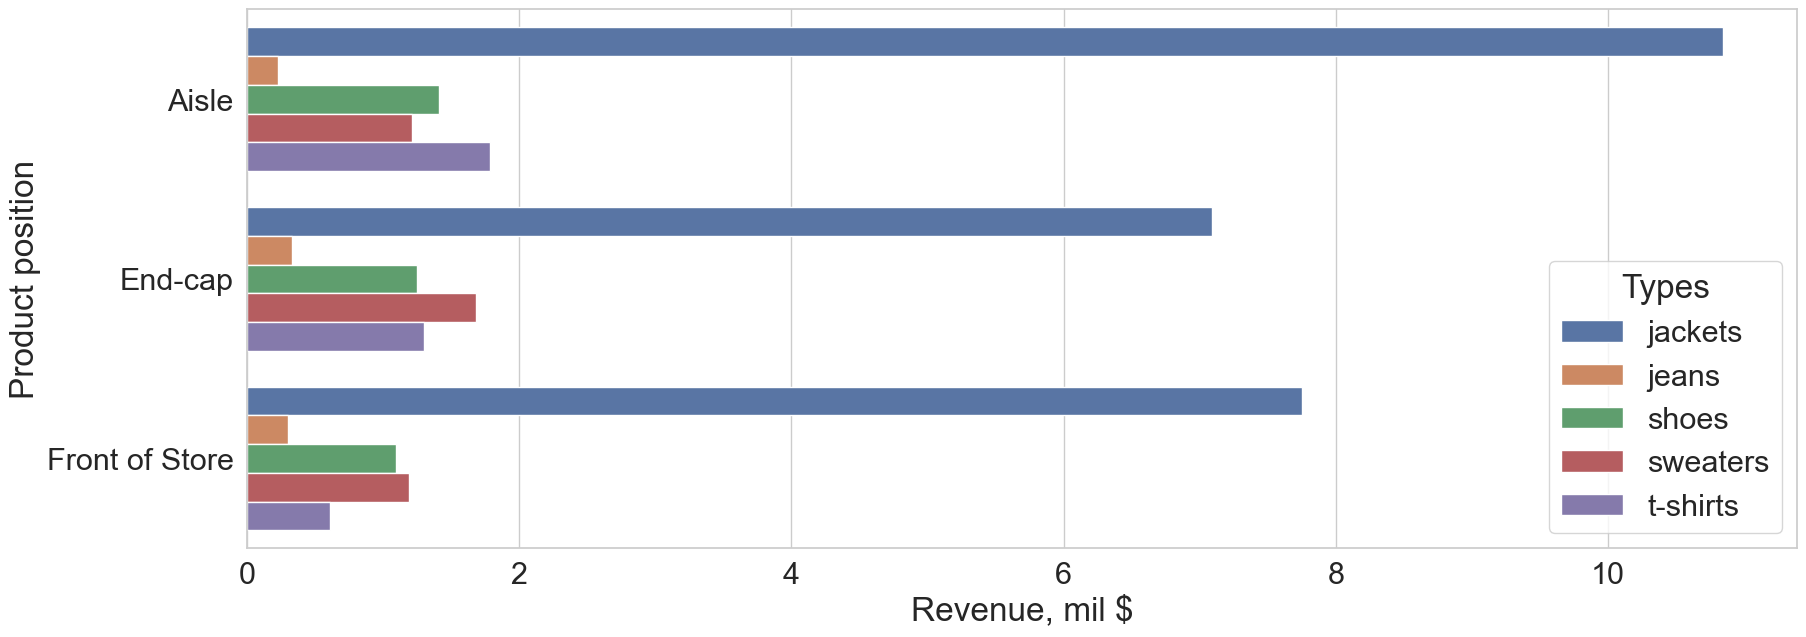

In [390]:
rev_by_prod_pos_w_terms_df =  sales.groupby(['product_position', 'terms'], as_index=False).revenue_by_item.sum()

# Строим датасет из sales с группировкой по типу товар, его местоположению в магазине и принесенной выручке

ax3_2 = sns.barplot(y   = rev_by_prod_pos_w_terms_df.product_position,
                    x   = rev_by_prod_pos_w_terms_df.revenue_by_item / 1000000,
                    hue = rev_by_prod_pos_w_terms_df.terms.rename('Types'))
ax3_2.set(xlabel='Revenue, mil $', ylabel='Product position')

# Распределение выручки по местонахождению товаров в магазине, в качестве подкатегорий использовались категории самих товаров:
# jackets, jeans, shoes, sweaters, t-shirts

# Слишком большой вклад вносит категория jackets, очевидный лидер. Представляет интерес посмотреть на отношение
# показателей остальных категорий без jackets, как позиций для диверсификации бизнеса.

[Text(0.5, 0, 'Revenue, mil $'), Text(0, 0.5, 'Product position')]

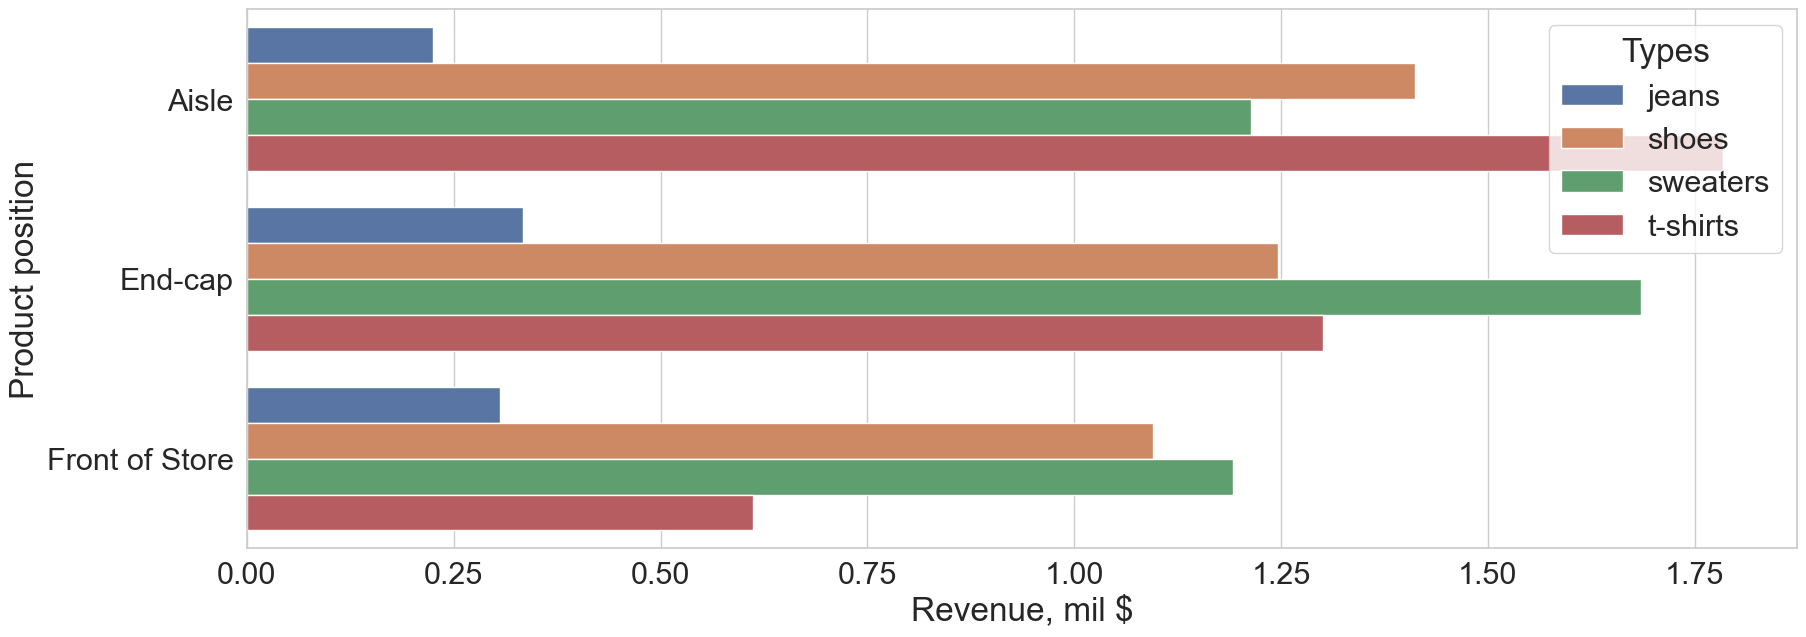

In [391]:
rev_by_prod_pos_w_terms_df_wo_jack = rev_by_prod_pos_w_terms_df \
                                .drop(rev_by_prod_pos_w_terms_df \
                                    .loc[rev_by_prod_pos_w_terms_df.terms == 'jackets'] \
                                    .index)

ax3_3 = sns.barplot(y   = rev_by_prod_pos_w_terms_df_wo_jack.product_position,
                    x   = rev_by_prod_pos_w_terms_df_wo_jack.revenue_by_item / 1000000,
                    hue = rev_by_prod_pos_w_terms_df_wo_jack.terms.rename('Types'))
ax3_3.set(xlabel='Revenue, mil $', ylabel='Product position')

# мы знаем, что shoes, sweaters, t-shirts приносят примерно одинаковую выручку, поэтому интересно как 
# местоположение в зале магазина влияет на выручку с каждой из этих категорий.
# Судя по полученным ниже зависимостям, в Aisle выгоднее всего выставлять t-shirts, 
# в End-cap - sweaters, а Front of store почти одинаково выгоден и для shoes, и sweaters.

[Text(0.5, 0, 'Sales volume'), Text(0, 0.5, 'Product position')]

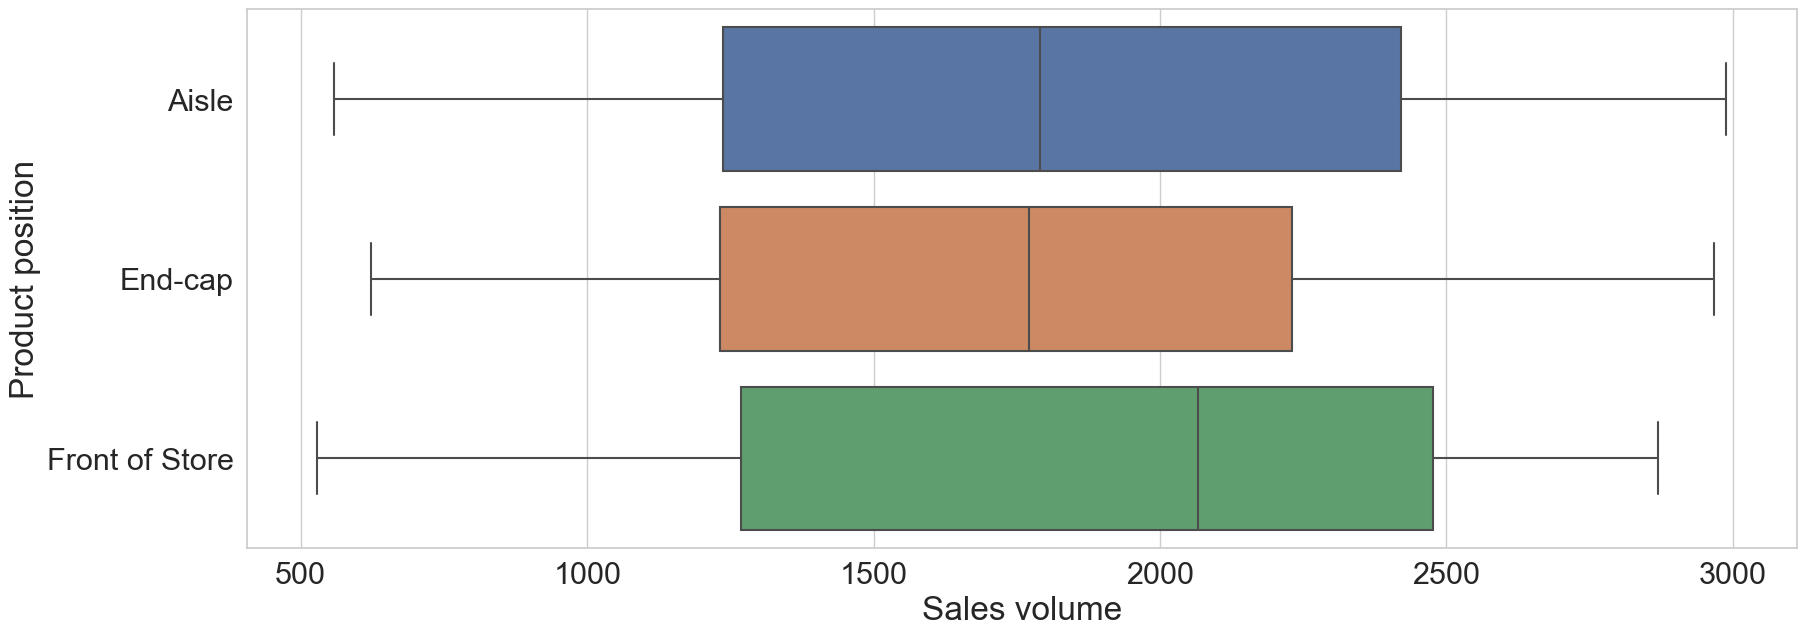

In [392]:
ax4_1 = sns.boxplot(x = sales.sales_volume, y = sales.product_position)

ax4_1.set(xlabel='Sales volume', ylabel='Product position')

# Оценим объемы продаж товаров в штуках в зависимости от местоположения в магазине

[Text(0.5, 0, 'Sales volume'), Text(0, 0.5, 'Product position')]

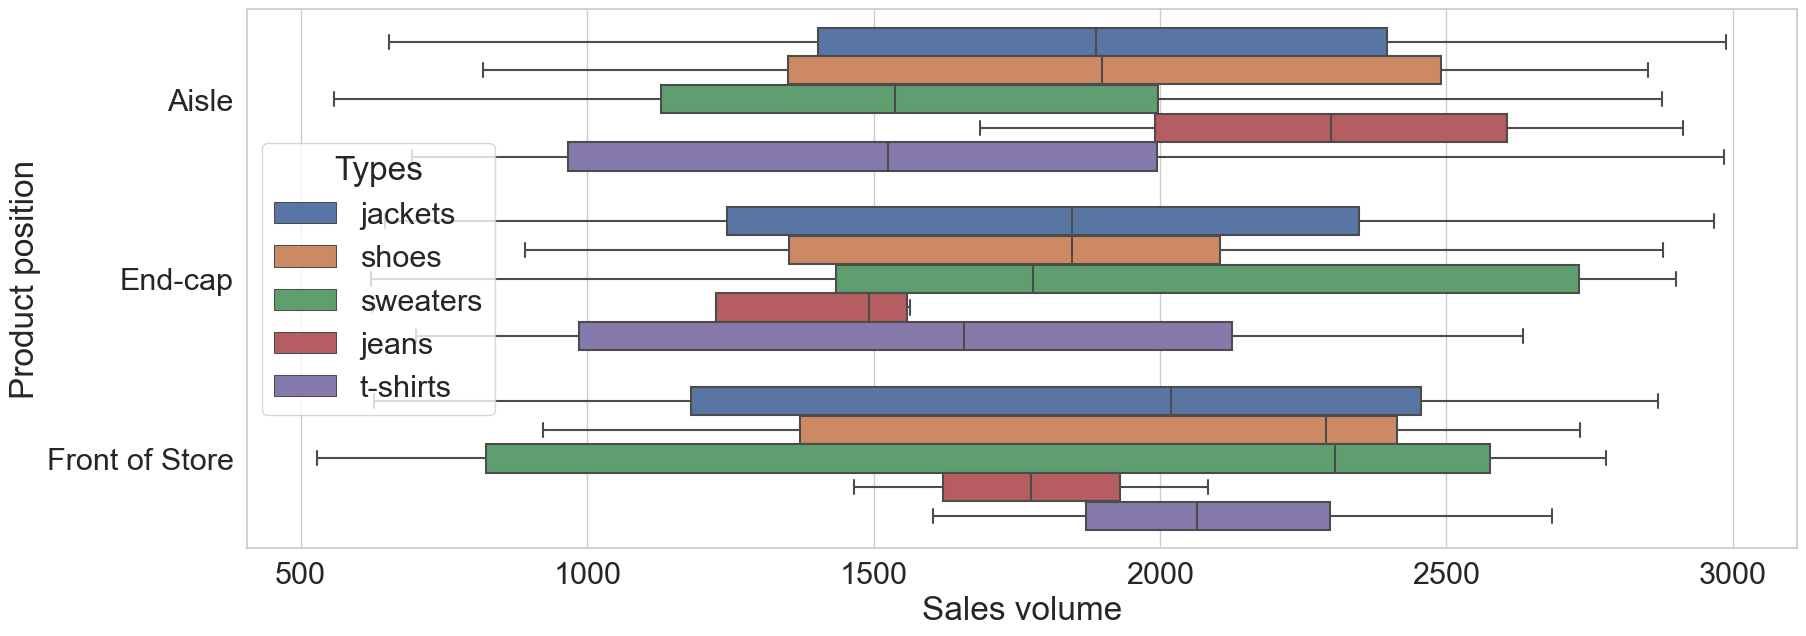

In [393]:
ax4_2=sns.boxplot(x = sales.sales_volume, 
            y = sales.product_position,
            hue = sales.terms.rename('Types'))

ax4_2.set(xlabel='Sales volume', ylabel='Product position')

# Строим боксплот по количеству проданного товара в зависимости от его типа и местонахождения в магазине